Cihazın ne zaman veya hangi cihazın hata vereceğini tahmin eder.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('failure (1).csv')

## EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.sample(5)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
72825,2015-04-21,S1F0KYCR,0,78022832,0,0,0,10,255611,0,0,0
55851,2015-03-17,W1F1DA55,0,123258656,0,0,0,13,44,0,0,0
6410,2015-01-06,W1F0RN8N,0,239102512,0,0,0,14,197343,0,0,0
104229,2015-07-18,W1F14N6K,0,68224992,0,0,0,16,367517,0,0,0
55323,2015-03-16,Z1F1VMZB,0,17383904,0,0,0,5,219968,0,0,0


In [5]:
df.failure.unique()

array([0, 1])

In [6]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [9]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [10]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


## FEATURE ENGINEERING & DATA VISUALIZATIONS

In [11]:
df.loc[:,'date']=pd.to_datetime(df.loc[:,"date"].astype(str),format="%Y-%m-%d")

In [12]:
df['day']=df['date'].dt.day

In [13]:
df['month']=df['date'].dt.month

In [14]:
df['year']=df['date'].dt.year

In [15]:
df=df.drop('date',axis=1)

In [16]:
df.sample(6)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
8431,S1F0C95J,0,57985616,0,0,0,5,239242,0,0,0,9,1,2015
64648,W1F0Z3KR,0,126024288,0,0,1,8,132252,0,0,0,1,4,2015
59112,W1F0X6VJ,0,52074280,0,0,0,7,244430,0,0,0,22,3,2015
27801,Z1F0MA1S,0,14923120,0,0,0,8,224415,0,0,0,4,2,2015
12236,S1F0GQCL,0,19151144,0,0,0,92,231440,0,0,0,14,1,2015
57062,W1F0TJ66,0,52589928,0,0,0,90,239989,0,0,0,19,3,2015


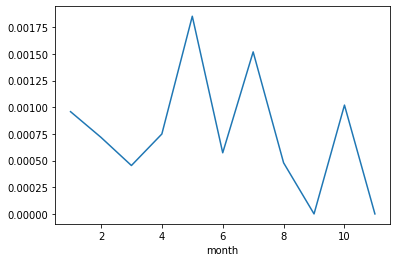

In [17]:
df.groupby('month')['failure'].mean().plot()

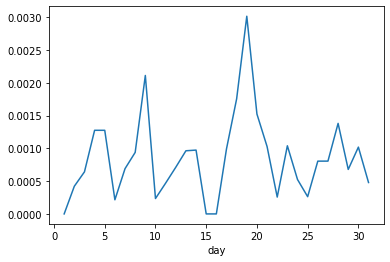

In [18]:
df.groupby('day')['failure'].mean().plot()

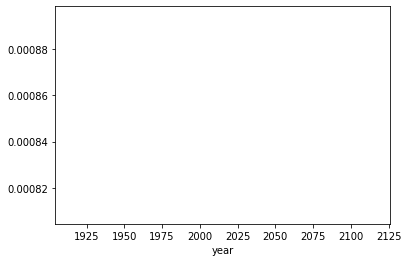

In [19]:
df.groupby('year')['failure'].mean().plot()

AttributeError: ignored

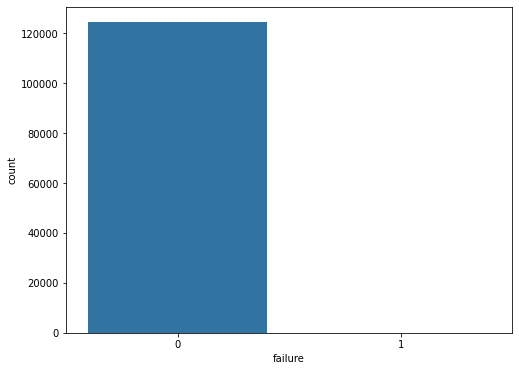

In [20]:
plt.figure(figsize=(8,6))
ax=sns.countplot(df["failure"]);
ax.bar_label(ax.containers[0]);

## CLASSIFICATION

In [21]:
x=df.drop('failure',axis=1)

In [22]:
y=df['failure']

In [23]:
x=pd.get_dummies(x,drop_first=True)

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((99595, 1179), (24899, 1179), (99595,), (24899,))

In [27]:
y_train.value_counts()

0    99507
1       88
Name: failure, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res,y_res=sm.fit_resample(x_train,y_train)

In [29]:
y_res.value_counts()

0    99507
1    99507
Name: failure, dtype: int64

In [30]:
 def classalgo_test(x_train,x_test,y_train,y_test): #classification
      
    g=GaussianNB()
    b=BernoulliNB()
    kc=KNeighborsClassifier()
    lr=LogisticRegression()
    dc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    
    
    algos = [g,b,kc,lr,dc,rfc,gbc]
    algo_names = ['GaussianNB','BernoulliNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier']
    accsc=[]
    precsc=[]
    
    result = pd.DataFrame(columns = ['Accuracy Score','Precision Score'],index = algo_names)
    
    for algo in algos:
    
        algo.fit(x_train,y_train)
        pred=algo.predict(x_test)
        accsc.append(accuracy_score(pred,y_test))
        precsc.append(precision_score(pred,y_test))
    
    result['Accuracy Score'] = accsc
    result['Precision Score'] = precsc
    
    return result.sort_values('Accuracy Score', ascending=False)

In [31]:
classalgo_test(x_res,x_test,y_res,y_test)

,Accuracy Score,Precision Score
RandomForestClassifier,0.998916,0.000000
DecisionTreeClassifier,0.997630,0.055556
GaussianNB,0.993534,0.222222
BernoulliNB,0.984859,0.333333
GradientBoostingClassifier,0.969918,0.555556
LogisticRegression,0.909916,0.611111
KNeighborsClassifier,0.791799,0.333333


In [32]:
lr=LogisticRegression()

In [33]:
lr.fit(x_res,y_res)

LogisticRegression()

In [34]:
tahmin1=lr.predict(x_test)

In [35]:
print(classification_report(tahmin1,y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     22652
           1       0.61      0.00      0.01      2247

    accuracy                           0.91     24899
   macro avg       0.76      0.50      0.48     24899
weighted avg       0.88      0.91      0.87     24899

